In [1]:
#Importing necessary modules
import os
import csv
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from pprint import pprint
#Setting up parameters for the API Key
api_key='KMXu7o4jj9H_5fBmmoxcQUXUcjaIiDMpnabg34SZhyJUQPt-H6y8sfBIq8jI65xOovUH7cKhDpTUnvK2UIFOf1r5864boyx0PCcIwR4QQ1OeR8IWr5RO7UxW3HJoXXYx'
headers = {'Authorization': 'Bearer %s' % api_key}
#Defining the Business Search end point url
url='https://api.yelp.com/v3/businesses/search'

In [2]:
# In the dictionary, term can take values like food, cafes or businesses like McDonalds
# Pulling Restaurant reviews for 4 major Cities 
cities =['New York','San Francisco','Houston','Chicago']
restaurants = []
for city in cities:
    #Pulling 1000 responses for each City ( as 1000 is the allowed limit)
        for offset in range(0,1000,50):
            params = {'term':'restaurants','location':city,'sort_by':'distance','limit':50, 'offset':offset}
            response = requests.get(url, params=params, headers=headers).json()
            restaurants.append(dict(response))

In [3]:
# pprint(restaurants[1])

In [4]:
#Defining empty dictionary to save only required elements
final = {}
#Defining Empty list to append all the data 
data = []

for restaurant in restaurants:
    try:
        for item in restaurant['businesses']:
            final['Restaurant Name'] = item['name']
            final['City'] = item['location']['city']
            final['Rating'] = item['rating']
            final['Reviews'] = item['review_count']
            try:
                final['Price'] = item['price']
            except:
                final['Price'] = float('nan')
            data.append(dict(final))
    except:   
        restaurant['businesses'] = float('nan')

In [5]:
#Creating a DataFrame to save the Rating,Reviews , Price etc for 5000 restaurants per City
restaurants_df = pd.DataFrame(data)
restaurants_df.head()

,City,Price,Rating,Restaurant Name,Reviews
0,Brooklyn,$,4.5,Born & Raised NYC,6
1,New York,NaN,4.0,Landhaus,1
2,Brooklyn,$$,4.0,Luke's Lobster Brooklyn Bridge Park,303
3,Brooklyn,$$$,4.0,Sugarcane Raw Bar Grill,508
4,Brooklyn,$,3.5,Calexico Taco / Burrito Cart,28


In [41]:
#Dropping Nan values
restaurants_df.dropna(axis='index',how='any',inplace=True)
restaurants_df.reset_index(drop=True)
restaurants_df.head()

,City,Price,Rating,Restaurant Name,Reviews,Price Values
0,Brooklyn,$,4.5,Born & Raised NYC,6,1
2,Brooklyn,$$,4.0,Luke's Lobster Brooklyn Bridge Park,303,2
3,Brooklyn,$$$,4.0,Sugarcane Raw Bar Grill,508,3
4,Brooklyn,$,3.5,Calexico Taco / Burrito Cart,28,1
5,Brooklyn,$$,3.0,Ignazio's,497,2


In [42]:
restaurants_df['Rating'].value_counts()

4.0    1246
3.5     797
4.5     519
3.0     320
2.5     184
2.0      99
5.0      60
1.5      37
1.0      14
Name: Rating, dtype: int64

In [43]:
newyork_df = restaurants_df[restaurants_df['City']=='New York']
chicago_df = restaurants_df[restaurants_df['City']=='Chicago']
houston_df = restaurants_df[restaurants_df['City']=='Houston']
sanfran_df = restaurants_df[restaurants_df['City']=='San Francisco']
# newyork_df['City'].unique()

# Plotting

In [44]:
restaurants_df['Price Values'] = restaurants_df['Price'].replace({'$': 1,'£': 1, '$$':2,'££': 2, '$$$':3, '$$$$':4})
restaurants_df.head()

,City,Price,Rating,Restaurant Name,Reviews,Price Values
0,Brooklyn,$,4.5,Born & Raised NYC,6,1
2,Brooklyn,$$,4.0,Luke's Lobster Brooklyn Bridge Park,303,2
3,Brooklyn,$$$,4.0,Sugarcane Raw Bar Grill,508,3
4,Brooklyn,$,3.5,Calexico Taco / Burrito Cart,28,1
5,Brooklyn,$$,3.0,Ignazio's,497,2


In [45]:
# Convert Average Rating to List
average_ratings = pd.DataFrame(restaurants_df.groupby('Price Values')['Rating'].mean())
average_ratings


,Rating
Price Values,
1,3.541478
2,3.778741
3,3.889831
4,4.071429


([<matplotlib.axis.XTick at 0x1d38ab880b8>,
 <a list of 4 Text xticklabel objects>)

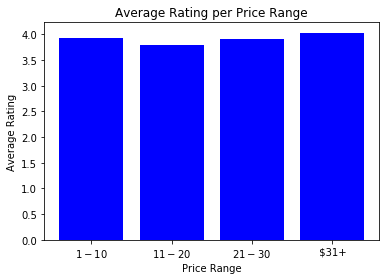

In [46]:


#Plot for Average Rating vs Price Range 
price = ["$1-$10", "$11-$20", "$21-$30", " $31+"]
x_axis = np.arange(len(price))
average_rating = [3.937057, 3.792747, 3.904517, 4.031915]
plt.bar(x_axis, average_rating, color="b", align="center")
plt.title('Average Rating per Price Range')
plt.ylabel('Average Rating')
plt.xlabel('Price Range')
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, price )

([<matplotlib.axis.XTick at 0x1d3892d6c88>,
 <a list of 4 Text xticklabel objects>)

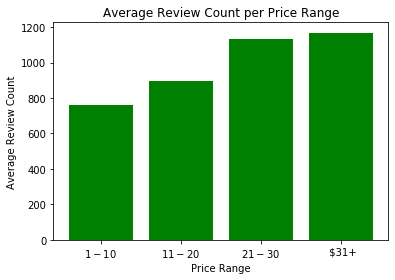

In [47]:
price = ["$1-$10", "$11-$20", "$21-$30", " $31+"]
average_reviews = [759.363475, 894.756482, 1135.550308, 1168.212766]
x_axis = np.arange(len(average_reviews))
plt.bar(x_axis, average_reviews, color="g", align="center")
plt.title('Average Review Count per Price Range')
plt.ylabel('Average Review Count')
plt.xlabel('Price Range')
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, price )

([<matplotlib.axis.XTick at 0x1d38ab8e320>,
 <a list of 8 Text xticklabel objects>)

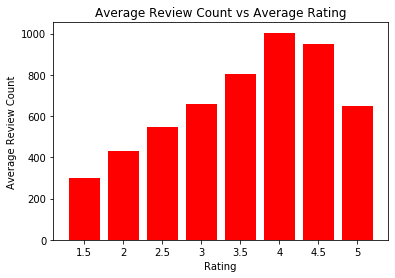

In [48]:
rating = ["1.5", "2", "2.5", "3", "3.5", "4", "4.5", "5"]
average_reviews_rating = [300.000000, 429.545455, 547.840909, 657.438017, 805.779777, 1004.157484, 950.435789, 647.750000]
x_axis = np.arange(len(average_reviews_rating))
plt.bar(x_axis, average_reviews_rating, color="r", align="center")

plt.title('Average Review Count vs Average Rating')
plt.ylabel('Average Review Count')
plt.xlabel('Rating')
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, rating )

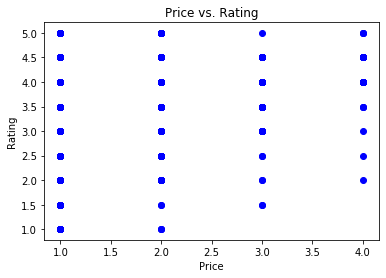

In [61]:
plt.scatter(restaurants_df["Price Values"], restaurants_df["Rating"], color="blue")
plt.title("Price vs. Rating")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.show()

In [62]:
# Plots of Price vs. Average Number of Reviews

average_reviews = pd.DataFrame(restaurants_df.groupby('Price Values')['Reviews'].mean())
average_reviews

,Reviews
Price Values,
1,162.959276
2,411.201618
3,631.350282
4,335.166667


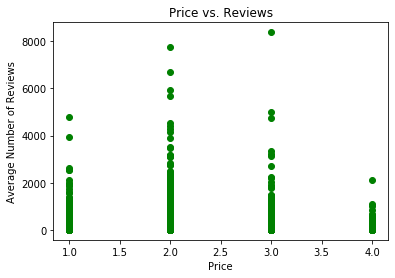

In [63]:
plt.scatter(restaurants_df["Price Values"], restaurants_df["Reviews"], color="green")
plt.title("Price vs. Reviews")
plt.xlabel("Price")
plt.ylabel("Average Number of Reviews")
plt.show()

In [54]:
# Plots of Rating vs. Average Number of Reviews

average_reviews_rating = pd.DataFrame(restaurants_df.groupby('Rating')['Reviews'].mean())
average_reviews_rating

,Reviews
Rating,
1.0,3.357143
1.5,33.243243
2.0,42.515152
2.5,65.635870
3.0,158.306250
3.5,322.301129
4.0,459.174157
4.5,295.140655
5.0,54.933333


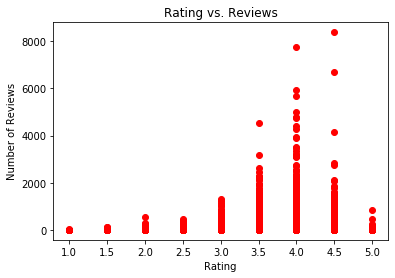

In [55]:
plt.scatter(restaurants_df["Rating"], restaurants_df["Reviews"], color="red")
plt.title("Rating vs. Reviews")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

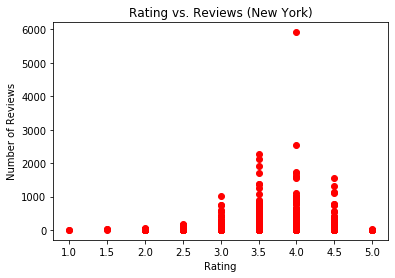

In [56]:
plt.scatter(newyork_df["Rating"], newyork_df["Reviews"], color="red")
plt.title("Rating vs. Reviews (New York)")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

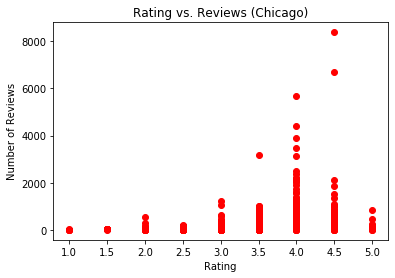

In [57]:
plt.scatter(chicago_df["Rating"], chicago_df["Reviews"], color="red")
plt.title("Rating vs. Reviews (Chicago)")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

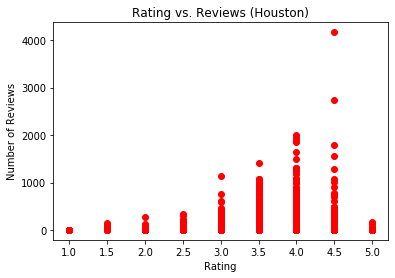

In [58]:
plt.scatter(houston_df["Rating"], houston_df["Reviews"], color="red")
plt.title("Rating vs. Reviews (Houston)")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

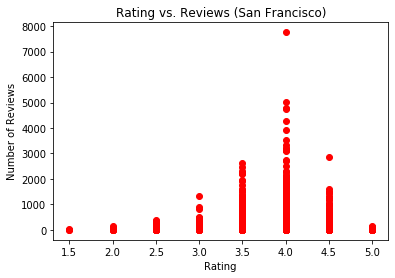

In [59]:
plt.scatter(sanfran_df["Rating"], sanfran_df["Reviews"], color="red")
plt.title("Rating vs. Reviews (San Francisco)")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

Text(0.5, 1.0, 'Review Percentage per city')

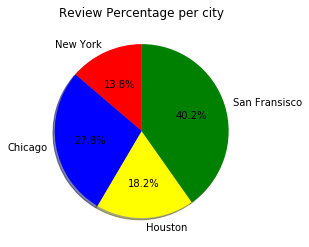

In [60]:
#Pie Chart Review Percentage per city
newyork_totalreviews = newyork_df['Reviews'].sum()
chicago_totalreviews = chicago_df['Reviews'].sum()
houston_totalreviews = houston_df['Reviews'].sum()
sanfran_totalreviews = sanfran_df['Reviews'].sum()
totalreviews = []
totalreviews.append(newyork_totalreviews)
totalreviews.append(chicago_totalreviews)
totalreviews.append(houston_totalreviews)
totalreviews.append(sanfran_totalreviews)
labels = ['New York', 'Chicago','Houston', 'San Fransisco']
colors = ['Red', 'Blue', 'Yellow' , 'Green']
plt.pie(totalreviews, labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 90, shadow = True)
plt.title('Review Percentage per city')
